# Import Packages and Datasets

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm # cross correlation
from prophet import Prophet
from datetime import datetime, timedelta

# Import the library
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
currency_name = {
    'Pablos' : 'San Escobar Pablos',
    'Credits' : 'Galactic Credits',
    'Dragons' : '7 Kingdoms Golden Dragons'}

In [3]:
# Import data

data_currency = pd.read_csv('../data/currencies_history.csv')

data_currency.rename(columns = {
    'SanEscobarPablos' : 'Pablos', 
    'GalacticCredits' : 'Credits', 
    '7KingdomsGoldenDragons' : "Dragons"}, 
    inplace = True)
print(data_currency)

data_ore = pd.read_csv('../data/Westeros_price.csv', sep = ';')
print(data_ore)

           Date    Pablos   Credits   Dragons
0    1000-01-03  1.000000  1.000000  1.000000
1    1000-01-10  0.992992  0.993418  0.988996
2    1000-01-17  0.988567  0.984193  0.981877
3    1000-01-24  0.999371  0.993381  0.984385
4    1000-01-31  1.014246  1.009505  0.992576
..          ...       ...       ...       ...
504  1009-09-01  3.734013  1.781049  1.152489
505  1009-09-08  3.725841  1.781063  1.151324
506  1009-09-15  3.667033  1.763477  1.145472
507  1009-09-22  3.694200  1.767235  1.145266
508  1009-09-29  3.734622  1.773911  1.148276

[509 rows x 4 columns]
           Date  WesterosOrePrice
0    1000-01-03          1.000000
1    1000-01-10          1.023292
2    1000-01-17          1.019991
3    1000-01-24          0.987717
4    1000-01-31          0.957423
..          ...               ...
512  1009-10-27          1.510558
513  1009-11-03          1.523103
514  1009-11-10          1.508391
515  1009-11-17          1.476787
516  1009-11-24          1.477897

[517 rows x 2 c

# Testing Autoarima

In [4]:
def prophet_convertion(y, df = data_currency, ds = 'Date'):
    '''
    Transoforms data so profet package could work
    It picks two columns - date and predictor and
    changes their names to 'ds' and 'y'
    '''
    return pd.DataFrame().assign(ds = df[ds], y = df[y])

In [5]:
# Temporary change year from 1000 to 2000 in to convert to datetime format
data_currency['Date'] = [date.replace("1", "2", 1) for date in data_currency['Date']]
data_currency['Date'] = pd.to_datetime(data_currency['Date'])

data_pablos = prophet_convertion('Pablos')
data_credits = prophet_convertion('Credits')
data_dragons = prophet_convertion('Dragons')

In [25]:
def fit_model(data):
    stepwise_fit = auto_arima(data, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
    print(stepwise_fit.summary())

In [26]:
def get_forecast(data, order, seasonal_order):
    model = SARIMAX(data, 
                order = order, 
                seasonal_order = seasonal_order)
    
    result = model.fit()

    forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 8, 
                          typ = 'levels').rename('Forecast')
    
    data.plot(figsize = (12, 5), legend = True)
    forecast.plot(legend = True)
    print(forecast)

In [27]:
fit_model(data_pablos['y'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-2047.691, Time=1.01 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1895.969, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1968.331, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-2037.948, Time=0.75 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-1919.875, Time=0.23 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-2045.744, Time=1.06 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-2045.777, Time=2.35 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-1974.750, Time=0.48 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-2043.711, Time=2.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-2040.295, Time=1.39 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-2051.824, Time=2.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=-1920.861, Time=0.39 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=-2046.218, Time=1.95 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=inf, Time=3.27 sec
 ARIMA(2,1,

509    3.742443
510    3.770817
511    3.792129
512    3.833682
513    3.869562
514    3.944818
515    3.953926
516    3.967869
Name: Forecast, dtype: float64


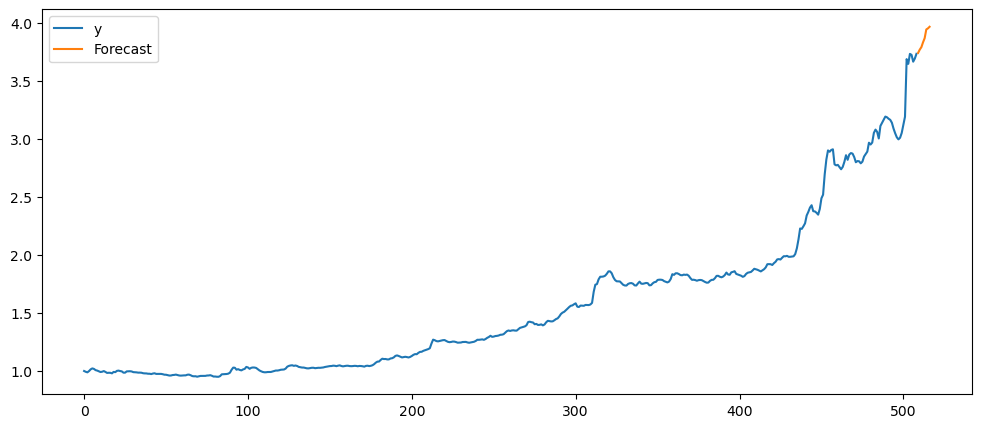

In [33]:
get_forecast(data_pablos['y'], (2, 1, 0), (0, 1, 1, 12))

In [28]:
fit_model(data_credits['y'])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-1437.953, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-2749.550, Time=0.75 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1393.063, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-2653.776, Time=0.27 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-2792.215, Time=3.41 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.59 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-1445.087, Time=1.62 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-2889.930, Time=3.58 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-2855.276, Time=1.34 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=-2913.629, Time=3.67 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,0,0)(2,1,2)[12] intercept 

509    1.772366
510    1.777592
511    1.774464
512    1.774640
513    1.772955
514    1.767279
515    1.765820
516    1.765768
Name: Forecast, dtype: float64


C:\Users\PLBOJARSPA\Miniconda3\envs\my_env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


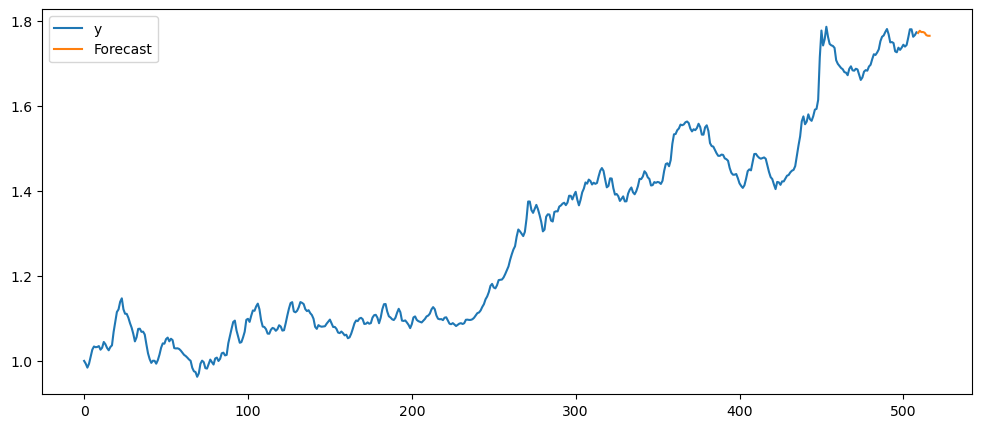

In [34]:
get_forecast(data_credits['y'], (2, 0, 1), (1, 1, 1, 12))

In [29]:
fit_model(data_dragons['y'])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-3848.821, Time=2.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-2202.272, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-3583.092, Time=0.94 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-2194.585, Time=0.10 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-3624.479, Time=0.96 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-3716.815, Time=2.61 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-3836.655, Time=4.55 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-3756.304, Time=1.47 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=6.97 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-3787.456, Time=1.76 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-2200.348, Time=0.55 sec
 ARIMA(0,0,2)(0,1,1)[12] inte

509    1.148024
510    1.146782
511    1.146424
512    1.146526
513    1.149016
514    1.149072
515    1.148422
516    1.147349
Name: Forecast, dtype: float64


C:\Users\PLBOJARSPA\Miniconda3\envs\my_env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


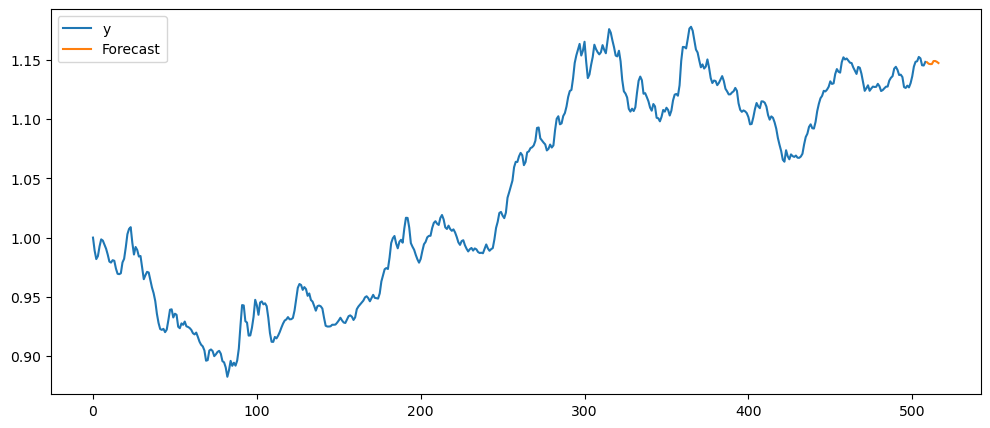

In [35]:
get_forecast(data_dragons['y'], (1, 0, 1), (0, 1, 1, 12))